# RANDOM FOREST Classifier

### Random Forest on MNIST AND IRIS dataset

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### EXAMPLE-1 MNIST Dataset

**Loading the dataset**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

**Exploring the dataset**

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

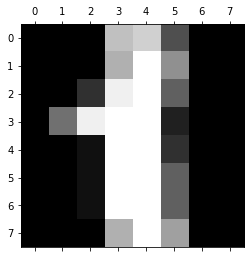

In [7]:
%matplotlib inline

plt.matshow(digits.images[1], cmap='gray')

In [8]:
df = pd.DataFrame(digits.data)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


### Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier(n_estimators=50)

In [20]:
model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=50)

In [26]:
def get_scores(n_est):
    model = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, random_state=42)
    model.fit(train_X, train_y)
    train_acc = model.score(train_X, train_y)
    test_acc = model.score(test_X, test_y)
    return {'n_estimator': n_est, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

In [27]:
get_scores(10)

{'n_estimator': 10, 'Train Accuracy': 1.0, 'Test Accuracy': 0.9583333333333334}

**SIMPLE HYPERPARAMETER TUNING**

In [31]:
%%time
errors_df = pd.DataFrame([get_scores(n_est) for n_est in range(10, 101, 10)])

Wall time: 4.86 s


In [32]:
errors_df

,n_estimator,Train Accuracy,Test Accuracy
0,10,1.0,0.958333
1,20,1.0,0.963889
2,30,1.0,0.963889
3,40,1.0,0.966667
4,50,1.0,0.972222
5,60,1.0,0.972222
6,70,1.0,0.972222
7,80,1.0,0.972222
8,90,1.0,0.972222
9,100,1.0,0.972222


In [33]:
y_predict = model.predict(test_X)

**ACCURACY CALCULATIONS**

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error

In [38]:
r2_score(test_y, y_predict)

0.9525327361301594

In [39]:
mean_squared_error(test_y, y_predict)

0.36666666666666664

In [40]:
accuracy_score(test_y, y_predict)

0.975

In [42]:
cm = confusion_matrix(test_y, y_predict)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]], dtype=int64)

CONFUSION MATRIX

Text(69.0, 0.5, 'Truth')

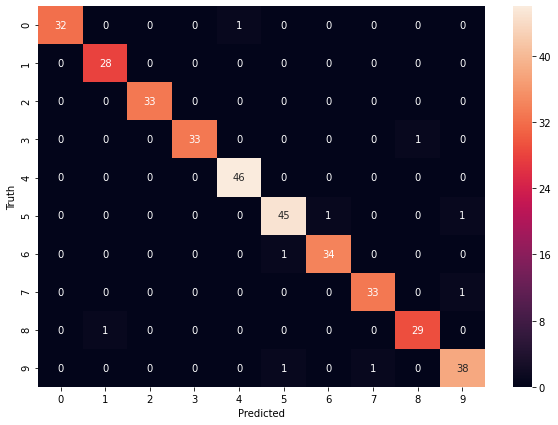

In [43]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# EXAMPLE-2 Iris dataset

**Loading the dataset**

In [47]:
from sklearn.datasets import load_iris

In [48]:
iris = load_iris()

In [49]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
iris.data.shape

(150, 4)

In [57]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
iris.target.shape

(150,)

In [56]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [59]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
iris_df2 = iris_df.copy()

In [64]:
mms = MinMaxScaler()

In [65]:
mms.fit(iris_df2.iloc[:, :-1])

MinMaxScaler()

In [66]:
iris_df2.iloc[:, :-1] = mms.transform(iris_df2.iloc[:, :-1])

In [67]:
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


### Train test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1], test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(iris_df2.iloc[:, :-1], iris_df2.iloc[:, -1], test_size=0.2, random_state=42)

In [70]:
print(x_train.shape)
print(X_train.shape)
print(y_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120, 4)
(120,)
(120,)
(30, 4)
(30,)
(30, 4)
(30,)


**RANDOM FOREST CLASSIFIER**

In [71]:
from sklearn.ensemble import RandomForestClassifier

## Prediction on non Scaled dataset

In [80]:
model_1 = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [81]:
model_1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [82]:
def get_scores_1(n_est):
    model = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, random_state=42)
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    return {'n_estimator': n_est, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

In [83]:
get_scores_1(10)

{'n_estimator': 10, 'Train Accuracy': 1.0, 'Test Accuracy': 1.0}

**HYPERPARAMETERS TUNING**

In [85]:
%%time
errors_df_1 = pd.DataFrame([get_scores_1(n_est) for n_est in range(10, 101, 10)])

Wall time: 3.98 s


In [86]:
errors_df_1

,n_estimator,Train Accuracy,Test Accuracy
0,10,1.0,1.0
1,20,1.0,1.0
2,30,1.0,1.0
3,40,1.0,1.0
4,50,1.0,1.0
5,60,1.0,1.0
6,70,1.0,1.0
7,80,1.0,1.0
8,90,1.0,1.0
9,100,1.0,1.0


In [94]:
y_pred_1 = model_1.predict(x_test)

**ACCURACY CALCULATIONS**

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error

In [98]:
r2_score(y_test, y_pred_1)

1.0

In [99]:
mean_squared_error(y_test, y_pred_1)

0.0

In [100]:
accuracy_score(y_test, y_pred_1)

1.0

In [109]:
cm1 = confusion_matrix(y_test, y_pred_1)
cm1

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

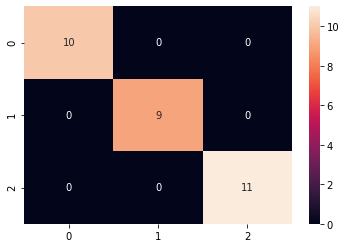

In [111]:
sns.heatmap(cm1, annot=True)

In [112]:
model_1.feature_importances_

array([0.11159383, 0.02860807, 0.44578786, 0.41401024])

## Prediction on Scaled dataset

In [88]:
model_2 = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [89]:
model_2.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [90]:
def get_scores_2(n_est):
    model = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, random_state=42)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    test_acc = model.score(X_test, Y_test)
    return {'n_estimator': n_est, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc}

In [91]:
get_scores_2(10)

{'n_estimator': 10, 'Train Accuracy': 1.0, 'Test Accuracy': 1.0}

**HYPERPARAMETERS TUNING**

In [92]:
%%time
errors_df_2 = pd.DataFrame([get_scores_2(n_est) for n_est in range(10, 101, 10)])

Wall time: 4.31 s


In [93]:
errors_df_2

,n_estimator,Train Accuracy,Test Accuracy
0,10,1.0,1.0
1,20,1.0,1.0
2,30,1.0,1.0
3,40,1.0,1.0
4,50,1.0,1.0
5,60,1.0,1.0
6,70,1.0,1.0
7,80,1.0,1.0
8,90,1.0,1.0
9,100,1.0,1.0


In [95]:
y_pred_2 = model_2.predict(X_test)

**ACCURACY CALCULATION**

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_squared_error

In [102]:
r2_score(Y_test, y_pred_2)

1.0

In [103]:
mean_squared_error(Y_test, y_pred_2)

0.0

In [104]:
accuracy_score(Y_test, y_pred_2)

1.0

In [106]:
cm2 = confusion_matrix(Y_test, y_pred_2)
cm2

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

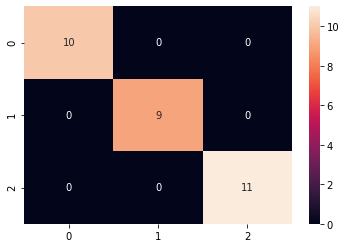

In [107]:
sns.heatmap(cm2, annot=True)

In [113]:
model_2.feature_importances_

array([0.11159383, 0.02860807, 0.44578786, 0.41401024])